What is the name of the .csv file? 
Converted 20211025_30p_S3_T1.csv


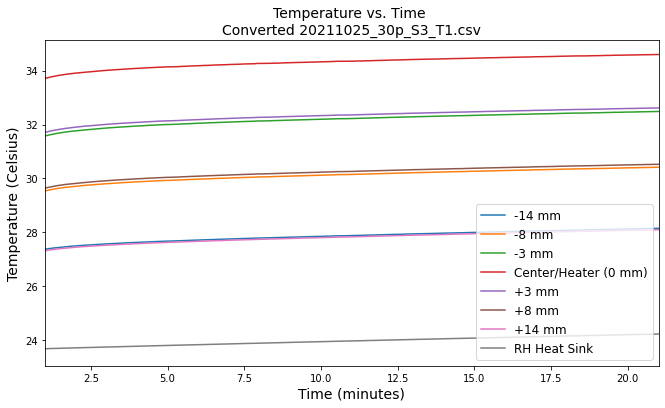

For time  480  we have;
 27.62  29.869  31.943  32.08  29.981  27.573  23.761
For time  720  we have;
 27.707  29.969  32.046  32.182  30.081  27.661  23.82
For time  960  we have;
 27.781  30.051  32.131  32.266  30.163  27.736  23.876
For time  1200  we have;
 27.845  30.117  32.197  32.331  30.229  27.799  23.931
   Time  -14 mm   -8 mm   -3 mm  Center   +3 mm   +8 mm  +14 mm  \
0   4.0  27.620  29.869  31.943  34.086  32.080  29.981  27.573   
1   6.0  27.707  29.969  32.046  34.186  32.182  30.081  27.661   
2   8.0  27.781  30.051  32.131  34.268  32.266  30.163  27.736   
3  10.0  27.845  30.117  32.197  34.328  32.331  30.229  27.799   

   Right Heat Sink  
0           23.761  
1           23.820  
2           23.876  
3           23.931  


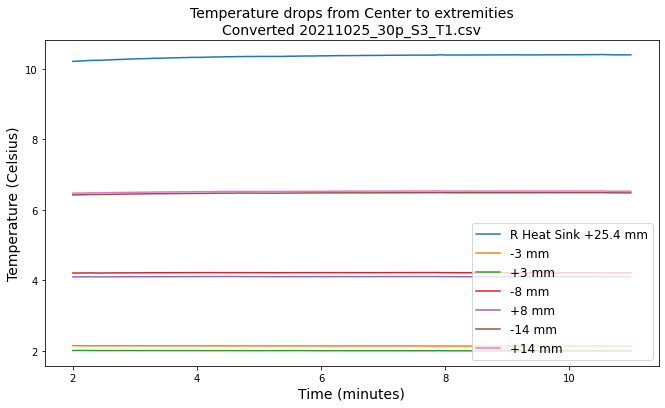

In [1]:
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt

filename=input("What is the name of the .csv file? \n")


with open(filename) as temperature_file:
        ch0 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=1)
with open(filename) as temperature_file:
        ch1 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=2)
with open(filename) as temperature_file:
        ch2 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=3)
with open(filename) as temperature_file:
        ch3 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=4)
with open(filename) as temperature_file:
        ch4 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=5)
with open(filename) as temperature_file:
        ch5 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=6)
with open(filename) as temperature_file:
        ch6 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=7)
with open(filename) as temperature_file:
        ch7 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=8)       
with open(filename) as temperature_file:
        timestamp = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=0)        

        
minutes=[i/120 for i in timestamp] 


        
plt.figure(figsize=(11,6))
plt.title("Temperature vs. Time \n"+filename,fontsize=14)
plt.plot(minutes,ch0,label='-14 mm')
plt.plot(minutes,ch1,label='-8 mm')
plt.plot(minutes,ch2,label='-3 mm')
plt.plot(minutes,ch3,label='Center/Heater (0 mm)')
plt.plot(minutes,ch4,label='+3 mm')
plt.plot(minutes,ch5,label='+8 mm')
plt.plot(minutes,ch6,label='+14 mm')
plt.plot(minutes,ch7,label='RH Heat Sink')
plt.legend(fontsize='large',loc='lower right')
plt.xlabel('Time (minutes)',fontsize=14)
plt.ylabel("Temperature (Celsius)",fontsize=14)
plt.xlim(1,max(minutes))
#plt.ylim(22.15)
plt.show()



for i in range(0,len(timestamp)):
    ch0[i]=np.around(ch0[i],decimals=3)
    ch1[i]=np.around(ch1[i],decimals=3)
    ch2[i]=np.around(ch2[i],decimals=3)
    ch3[i]=np.around(ch3[i],decimals=3)
    ch4[i]=np.around(ch4[i],decimals=3)
    ch5[i]=np.around(ch5[i],decimals=3)
    ch6[i]=np.around(ch6[i],decimals=3)
    ch7[i]=np.around(ch7[i],decimals=3)

times=np.array([4,6,8,10])

times=[i*120 for i in times]

#Modified for Sample 5 where -14 is Ch 1 and -8 is Ch0

#print(ch0[times[0]])    
l3=[None]*len(times)
l14=[None]*len(times)
l8=[None]*len(times)
cen=[None]*len(times)
r3=[None]*len(times)
r8=[None]*len(times)
r14=[None]*len(times)
rhs=[None]*len(times)
for i in range(0,len(times)):
    print('For time ',times[i],' we have;')
    print('',ch0[times[i]],'',ch1[times[i]],'',ch2[times[i]],'',ch4[times[i]],'',ch5[times[i]],'',ch6[times[i]],'',ch7[times[i]] )
    l14[i]=ch0[times[i]]
    l8[i]=ch1[times[i]]
    l3[i]=ch2[times[i]]
    cen[i]=ch3[times[i]]
    r3[i]=ch4[times[i]]
    r8[i]=ch5[times[i]]
    r14[i]=ch6[times[i]]
    rhs[i]=ch7[times[i]]
    
times=[i/120 for i in times]
df=pd.DataFrame(data=np.column_stack((times ,l14,l8,l3,cen,r3,r8,r14,rhs)), columns= ['Time', '-14 mm','-8 mm','-3 mm','Center','+3 mm','+8 mm','+14 mm','Right Heat Sink'])
print(df)                
    
df.to_csv(r'Temps times for '+filename+'',index=False,header=True)
  
# Use these to change the time frame    

ch0=ch0[240:1320]    
ch1=ch1[240:1320]    
ch2=ch2[240:1320]    
ch3=ch3[240:1320]    
ch4=ch4[240:1320]    
ch5=ch5[240:1320]    
ch6=ch6[240:1320]    
ch7=ch7[240:1320]
timestamp=timestamp[240:1320]
    
 
    
# Calculate delta T values    
L3=[None]*len(timestamp)    
L14=[None]*len(timestamp)
L8=[None]*len(timestamp)

R3=[None]*len(timestamp)
R8=[None]*len(timestamp)
R14=[None]*len(timestamp)
RHS=[None]*len(timestamp)
for i in range(0,len(timestamp)):
    L3[i]=ch3[i]-ch2[i]
    L8[i]=ch3[i]-ch1[i]
    L14[i]=ch3[i]-ch0[i]
    
    R3[i]=ch3[i]-ch4[i]
    R8[i]=ch3[i]-ch5[i]
    R14[i]=ch3[i]-ch6[i]
    RHS[i]=ch3[i]-ch7[i]
    
minutes=[i/120 for i in timestamp] 


    
plt.figure(figsize=(11,6))
plt.title("Temperature drops from Center to extremities\n"+filename,fontsize=14)
#plt.plot(minutes,LHS,label='L Heat Sink -25.4 mm')
plt.plot(minutes,RHS,label='R Heat Sink +25.4 mm')
plt.plot(minutes,L3,label='-3 mm')
plt.plot(minutes,R3,label='+3 mm')
plt.plot(minutes,L8,label='-8 mm')
plt.plot(minutes,R8,label='+8 mm')
plt.plot(minutes,L14,label='-14 mm')
plt.plot(minutes,R14,label='+14 mm')
plt.legend(fontsize='large',loc='lower right')
plt.xlabel('Time (minutes)',fontsize=14)
plt.ylabel("Temperature (Celsius)",fontsize=14)
plt.show()  



What is the name of the .csv file? 
Converted 20211025_30p_S3_T1.csv
We have the slope  -0.001 +/- 0.0  and the intercept  23.606
At x=1.45 we have a T of  23.605
23.604923424675455
The difference between center and the bound is:  -0.004


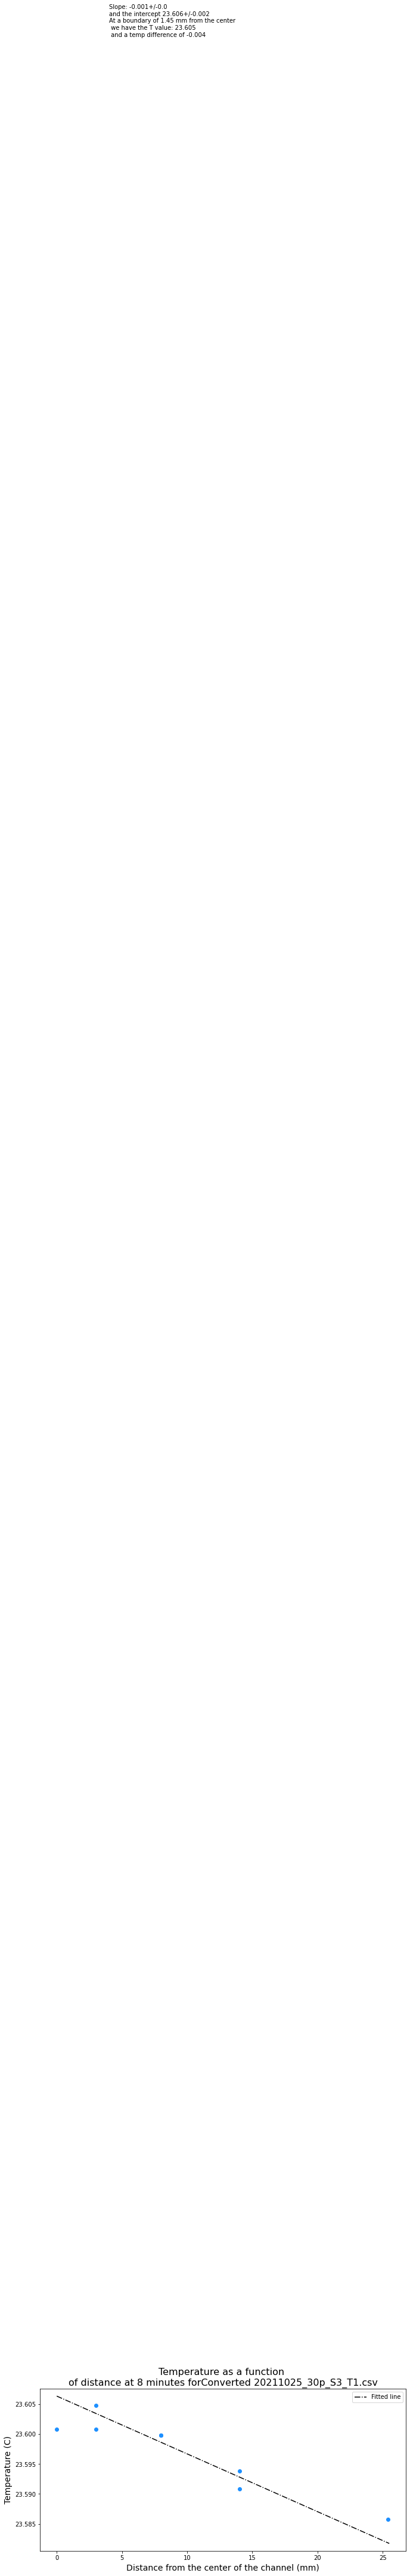

In [7]:
import matplotlib.pyplot as plt
import math
from statistics import mean
from statistics import stdev
import numpy as np
from scipy.optimize import curve_fit
################
#Temps times for 
##########################
filename=input("What is the name of the .csv file? \n")

with open(filename) as temperature_file:
        xn14 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=1)
with open(filename) as temperature_file:
        xn8 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=2)
with open(filename) as temperature_file:
        xn3 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=3)
with open(filename) as temperature_file:
        xm0 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=4)
with open(filename) as temperature_file:
        xp3 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=5)
with open(filename) as temperature_file:
        xp8 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=6)
with open(filename) as temperature_file:
        xp14 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=7)
with open(filename) as temperature_file:
        xhs = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=8)


############################

#These are the x positions of the thermistors where the center is the reference
xfit=np.array([14,8,3,3,8,14])

Tfit=np.array([xn14[0],xn8[0],xn3[0],xp3[0],xp8[0],xp14[0]])



def line(x,m,b):
    y=m*x+b
    return y

xplot=np.array([14,8,3,0,3,8,14,25.4])
tplot=np.array([xn14[0],xn8[0],xn3[0],xm0[0],xp3[0],xp8[0],xp14[0],xhs[0]])




popt,pcov=curve_fit(line,xfit,Tfit,p0=[-0.39,33])




ls=str(np.around(popt[0],decimals=3))
li=str(np.around(popt[1],decimals=3))
els=np.sqrt(np.diag(pcov))

print("We have the slope ",np.around(popt[0],decimals=3),'+/-',np.around(els[0],decimals=3),' and the intercept ',np.around(popt[1],decimals=3)),'+/-',np.around(els[1],decimals=3)


lval=els[1]
#errors
els=str(np.around(els[0],decimals=3))
eli=str(np.around(lval,decimals=3))

rint=line(1.45,popt[0],popt[1])
print("At x=1.45 we have a T of ",np.around(rint,decimals=3))

print(rint)

bound=str(np.around(rint,decimals=3))

diff=tplot[3]-rint
diffstr=str(np.around(diff,decimals=3))
a="Slope: "+ls+'+/-'+els+' \nand the intercept '+li+'+/-'+eli+"\nAt a boundary of 1.45 mm from the center\n we have the T value: "+bound+'\n and a temp difference of '+diffstr



print("The difference between center and the bound is: ",np.around(diff,decimals=3) )

drx=np.arange(0,25.6,step=0.1)


dry=[None]*len(drx)
for i in range(0,len(drx)):
    dry[i]=line(drx[i],popt[0],popt[1])
"""
fitx=np.array(np.full(10,1.45))
fity=np.array(np.arange(24,35,1.1))
print(fitx)
print(fity)
"""


plt.figure(figsize=(11,5))
plt.title("Temperature as a function \nof distance at 8 minutes for"+filename,fontsize=16)
plt.xlabel('Distance from the center of the channel (mm)',fontsize=14)
plt.ylabel('Temperature (C)',fontsize=14)
plt.scatter(xplot,tplot,color='dodgerblue',marker='o')
plt.plot(drx,dry,color='black',ls='-.',label='Fitted line')
#plt.plot(fitx,fity,color='mediumseagreen',label='Epoxy interface')
plt.text(4,24,a)
#plt.xticks((0,1.45,3,8,14,25.4))
plt.legend(loc="upper right")
plt.show()

In [3]:
## import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from statistics import mean
from statistics import stdev
import numpy as np
from tabulate import tabulate
from scipy.optimize import curve_fit


xfit=np.array([-14,-8,-3,0,3,8,14])

Tfit4=np.array([])
Tfit6=np.array([])
Tfit8=np.array([])
Tfit10=np.array([])



def line(x,m,b):
    y=m*x+b
    return y



popt4,pcov4=curve_fit(line,xfit,Tfit4,p0=[-0.39,33])
popt6,pcov6=curve_fit(line,xfit,Tfit6,p0=[-0.39,33])
popt8,pcov8=curve_fit(line,xfit,Tfit8,p0=[-0.39,33])
popt10,pcov10=curve_fit(line,xfit,Tfit10,p0=[-0.39,33])

#4 minutes    
ls4=str(np.around(popt4[0],decimals=3))
li4=str(np.around(popt4[1],decimals=3))
els4=np.sqrt(np.diag(pcov4))

print("4 minutes: We have the slope ",np.around(popt4[0],decimals=3),'+/-',np.around(els4[0],decimals=3),' and the intercept ',np.around(popt4[1],decimals=3)),'+/-',np.around(els4[1],decimals=3)


#lval=els[1]
#errors
els4=str(np.around(els4[0],decimals=3))
eli4=str(np.around(els4[1],decimals=3))

rint4=line(1.45,popt4[0],popt4[1])
print("For 4 min, at x=1.45 we have a T of ",np.around(rint4,decimals=3))

bound4=str(np.around(rint4,decimals=3))

a="Slope: "+ls4+'+/-'+els4+' \nand the intercept '+li4+'+/-'+eli4+"\nAt a boundary of 1.45 mm from the center\n we have the T value: "+bound4


diff4=Tfit4[3]-rint4

print("The difference between center and the bound is: ",np.around(diff4,decimals=3) )

#6 minutes
ls6=str(np.around(popt6[0],decimals=3))
li6=str(np.around(popt6[1],decimals=3))
els6=np.sqrt(np.diag(pcov6))

print("6 minutes: We have the slope ",np.around(popt6[0],decimals=3),'+/-',np.around(els6[0],decimals=3),' and the intercept ',np.around(popt6[1],decimals=3)),'+/-',np.around(els6[1],decimals=3)


#lval=els[1]
#errors
els6=str(np.around(els6[0],decimals=3))
eli6=str(np.around(els6[1],decimals=3))

rint6=line(1.45,popt6[0],popt6[1])
print("For 6 min, at x=1.45 we have a T of ",np.around(rint6,decimals=3))

bound6=str(np.around(rint6,decimals=3))

b="Slope: "+ls6+'+/-'+els6+' \nand the intercept '+li6+'+/-'+eli6+"\nAt a boundary of 1.45 mm from the center\n we have the T value: "+bound6


diff6=Tfit6[3]-rint6

print("The difference between center and the bound is: ",np.around(diff6,decimals=3) )

#8 minutes

ls8=str(np.around(popt8[0],decimals=3))
li8=str(np.around(popt8[1],decimals=3))
els8=np.sqrt(np.diag(pcov8))

print("8 minutes: We have the slope ",np.around(popt8[0],decimals=3),'+/-',np.around(els8[0],decimals=3),' and the intercept ',np.around(popt8[1],decimals=3)),'+/-',np.around(els8[1],decimals=3)


#lval=els[1]
#errors
els8=str(np.around(els8[0],decimals=3))
eli8=str(np.around(els8[1],decimals=3))

rint8=line(1.45,popt8[0],popt8[1])
print("For 8 min, at x=1.45 we have a T of ",np.around(rint8,decimals=3))

bound8=str(np.around(rint8,decimals=3))

c="Slope: "+ls8+'+/-'+els8+' \nand the intercept '+li8+'+/-'+eli8+"\nAt a boundary of 1.45 mm from the center\n we have the T value: "+bound8


diff8=Tfit8[3]-rint8

print("The difference between center and the bound is: ",np.around(diff8,decimals=3) )


#10 minutes

ls10=str(np.around(popt10[0],decimals=3))
li10=str(np.around(popt10[1],decimals=3))
els10=np.sqrt(np.diag(pcov8))

print("10 minutes: We have the slope ",np.around(popt10[0],decimals=3),'+/-',np.around(els10[0],decimals=3),' and the intercept ',np.around(popt10[1],decimals=3)),'+/-',np.around(els10[1],decimals=3)


#lval=els[1]
#errors
els10=str(np.around(els10[0],decimals=3))
eli10=str(np.around(els10[1],decimals=3))

rint10=line(1.45,popt10[0],popt10[1])
print("For 10 min, at x=1.45 we have a T of ",np.around(rint10,decimals=3))

bound10=str(np.around(rint10,decimals=3))

d="Slope: "+ls10+'+/-'+els10+' \nand the intercept '+li10+'+/-'+eli10+"\nAt a boundary of 1.45 mm from the center\n we have the T value: "+bound10


diff10=Tfit10[3]-rint10

print("The difference between center and the bound is: ",np.around(diff8,decimals=3) )

##############
#Plots#

drx=np.arange(0,25.6,step=0.1)

dry4=[None]*len(drx)
dry6=[None]*len(drx)
dry8=[None]*len(drx)
dry10=[None]*len(drx)
for i in range(0,len(drx)):
    dry4[i]=line(drx[i],popt4[0],popt4[1])
    dry6[i]=line(drx[i],popt6[0],popt6[1])
    dry8[i]=line(drx[i],popt8[0],popt8[1])
    dry10[i]=line(drx[i],popt10[0],popt10[1])



plt.figure(figsize=(11,5))


ModuleNotFoundError: No module named 'tabulate'

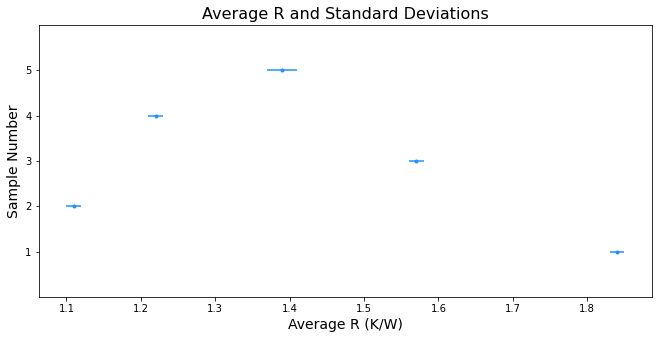

In [4]:
import numpy as np
import matplotlib.pyplot as plt

y=np.array([1,2,3,4,5])
x=np.array([1.84,1.11,1.57,1.22,1.39,])
xerr=np.array([0.01,0.01,0.01,0.01,0.02])

plt.figure(figsize=(11,5))
plt.title("Average R and Standard Deviations",fontsize=16)
plt.errorbar(x,y,xerr=xerr,linestyle='none',color='dodgerblue',fmt='.')
plt.yticks(y)
plt.ylim(0,6)
plt.xlabel('Average R (K/W)',fontsize=14)
plt.ylabel('Sample Number',fontsize=14)
plt.show()